In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from pylab import rcParams
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Project description

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.  ***cubic_zirconia.csv ***


### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.


In [2]:
df_gems = pd.read_csv("C:\\Users\\archy\\Downloads\\Predictive Modelig\\Project\\cubic_zirconia.csv")

In [3]:
df_gems.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df_gems.shape

(26967, 11)

In [5]:
df_gems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df_gems=df_gems.drop("Unnamed: 0",axis =1)

In [8]:
# we will rename columns x,y,z for better understanding.
df_gems.rename(columns = {'x':'Length'}, inplace = True) 
df_gems.rename(columns = {'y':'width'}, inplace = True) 
df_gems.rename(columns = {'z':'Height'}, inplace = True) 


In [9]:
df_gems.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
Length,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
width,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
Height,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [10]:
df_gems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   Length   26967 non-null  float64
 7   width    26967 non-null  float64
 8   Height   26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
df_gems['cut']=np.where(df_gems['cut'] =='Fair', '0', df_gems['cut'])
df_gems['cut']=np.where(df_gems['cut'] =='Good', '1', df_gems['cut'])
df_gems['cut']=np.where(df_gems['cut'] =='Very Good', '2', df_gems['cut'])
df_gems['cut']=np.where(df_gems['cut'] =='Premium', '3', df_gems['cut'])
df_gems['cut']=np.where(df_gems['cut'] =='Ideal', '4', df_gems['cut'])

In [12]:
df_gems['color']=np.where(df_gems['color'] =='D', '6', df_gems['color'])
df_gems['color']=np.where(df_gems['color'] =='E', '5', df_gems['color'])
df_gems['color']=np.where(df_gems['color'] =='F', '4', df_gems['color'])
df_gems['color']=np.where(df_gems['color'] =='G', '3', df_gems['color'])
df_gems['color']=np.where(df_gems['color'] =='H', '2', df_gems['color'])
df_gems['color']=np.where(df_gems['color'] =='I', '1', df_gems['color'])
df_gems['color']=np.where(df_gems['color'] =='J', '0', df_gems['color'])

In [13]:
df_gems['clarity']=np.where(df_gems['clarity'] =='IF', '7', df_gems['clarity'])
df_gems['clarity']=np.where(df_gems['clarity'] =='VVS1','6', df_gems['clarity'])
df_gems['clarity']=np.where(df_gems['clarity'] =='VVS2', '5', df_gems['clarity'])
df_gems['clarity']=np.where(df_gems['clarity'] =='VS1', '4', df_gems['clarity'])
df_gems['clarity']=np.where(df_gems['clarity'] =='VS2', '3', df_gems['clarity'])
df_gems['clarity']=np.where(df_gems['clarity'] =='SI1', '2', df_gems['clarity'])
df_gems['clarity']=np.where(df_gems['clarity'] =='SI2', '1', df_gems['clarity'])
df_gems['clarity']=np.where(df_gems['clarity'] =='I1', '0', df_gems['clarity'])

In [14]:
for feature in df_gems.columns:
    if df_gems [feature].dtype == 'object':
        df_gems [feature] = pd.Categorical(df_gems[feature]).codes

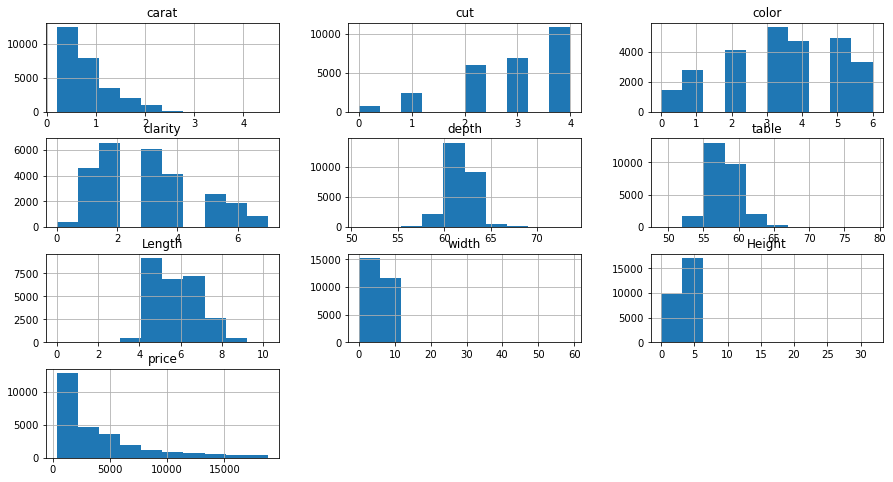

In [15]:
rcParams['figure.figsize'] = 15,8
df_gems[['carat','cut','color','clarity','depth','table','Length','width','Height','price']].hist();

In [16]:
df_gems.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
Length       0
width        0
Height       0
price        0
dtype: int64

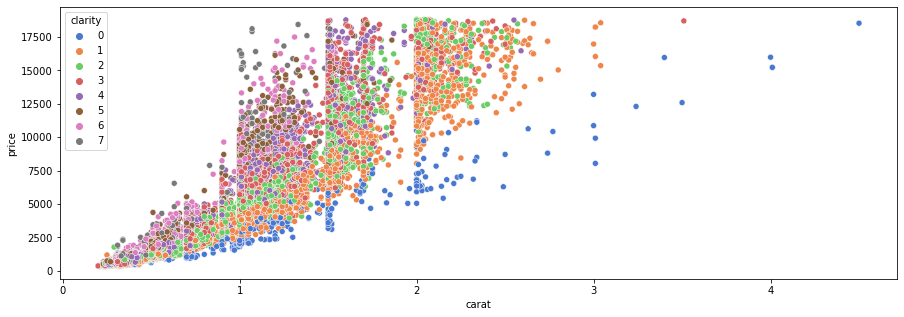

In [17]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_gems,x='carat',y='price',hue='clarity',palette='muted')
plt.show()

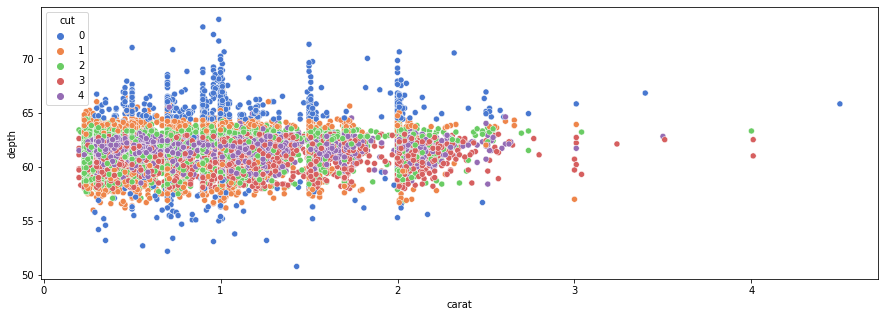

In [18]:
plt.figure(figsize=(15,5)) 
sns.scatterplot(data=df_gems,x='carat',y='depth',hue='cut',palette='muted')
plt.show()


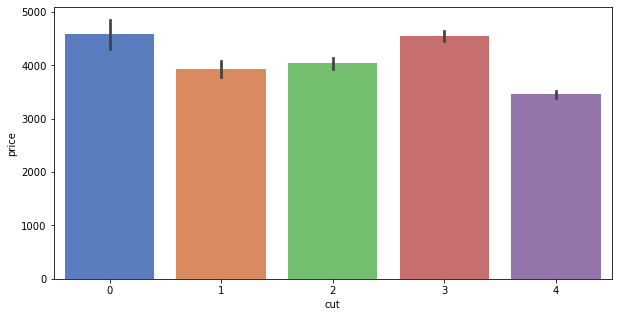

In [19]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='cut', y='price', data=df_gems, palette='muted')  # barplot

**As we can see here 'fair'and 'premium' type of zarconia gets the best preice.**

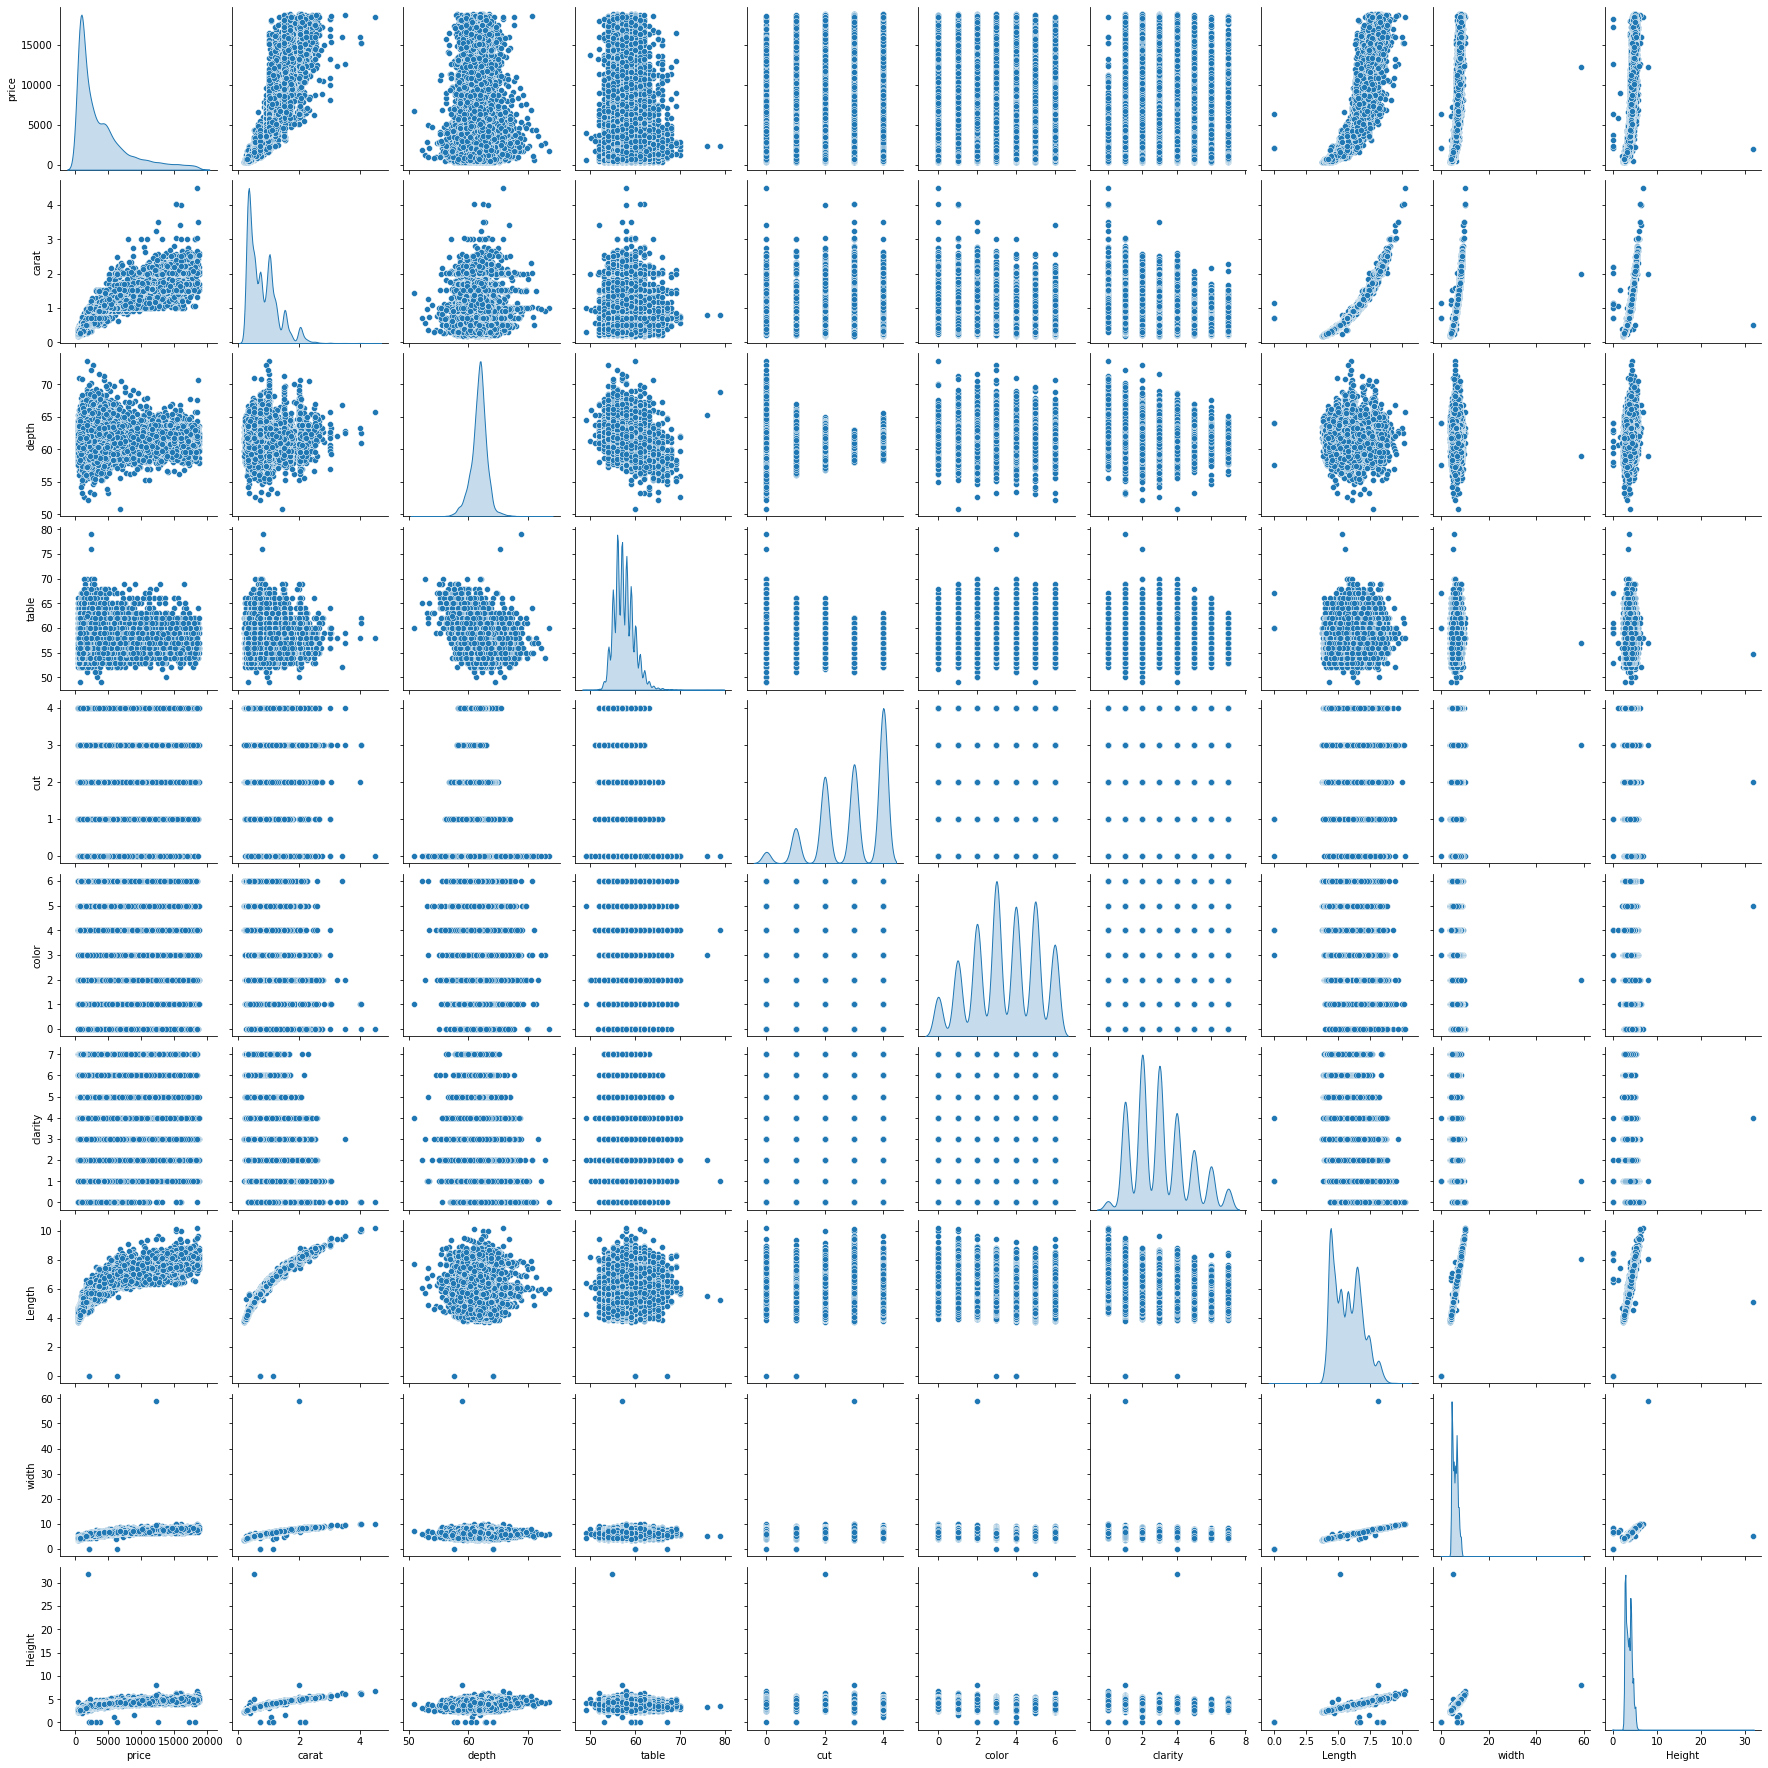

In [21]:
sns.pairplot(df_gems[['price','carat','depth','table','cut','color','clarity', 'Length', 'width','Height']], diag_kind = 'kde')

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [22]:
df_gems.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
Length       0
width        0
Height       0
price        0
dtype: int64

In [23]:
#imputing the null values
for column in df_gems.columns:
    if df_gems[column].dtype != 'object':
        mean = df_gems[column].median()
        df_gems[column] = df_gems[column].fillna(mean)    
        
df_gems.isnull().sum()        

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
Length     0
width      0
Height     0
price      0
dtype: int64

In [24]:
(df_gems == 0).sum().sum()

2604

In [25]:
df_gems.Length.sort_values()

6215      0.00
17506     0.00
5821      0.00
13051     3.73
5788      3.74
         ...  
15080     9.66
8156     10.01
3025     10.02
20505    10.14
12500    10.23
Name: Length, Length: 26967, dtype: float64

In [26]:
df_gems.width.sort_values(ascending=False).tail(10)

25498    3.78
20093    3.77
12748    3.77
10375    3.75
19108    3.72
5788     3.71
13051    3.71
17506    0.00
5821     0.00
6215     0.00
Name: width, dtype: float64

In [27]:
df_gems.Height.sort_values(ascending=False)

344      31.80
25795     8.06
12500     6.72
8156      6.31
12758     6.27
         ...  
5821      0.00
12689     0.00
12498     0.00
6215      0.00
23758     0.00
Name: Height, Length: 26967, dtype: float64

* There are values equal to zero in th columns x,y,z
* These columns ae r Length, Width and height of the cubic Zarconia
* We can say that this gem's width, length and height cannot tbe zero hence has to be imputed with their respective median.

In [28]:
print("df_gems:",df_gems.median())

df_gems: carat         0.70
cut           3.00
color         3.00
clarity       3.00
depth        61.80
table        57.00
Length        5.69
width         5.71
Height        3.52
price      2375.00
dtype: float64


In [29]:
df_gems.Length = df_gems.Length.replace(0,5.69)

In [30]:
df_gems.width = df_gems.width.replace(0,5.70)

In [31]:
df_gems.Height = df_gems.Height.replace(0,3.52)

In [32]:
print("df_gems:",df_gems.median())

df_gems: carat         0.70
cut           3.00
color         3.00
clarity       3.00
depth        61.80
table        57.00
Length        5.69
width         5.71
Height        3.52
price      2375.00
dtype: float64


In [33]:
df_gems.shape

(26967, 10)

dups = df_gems.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_gems[dups]

In [34]:
dups = df_gems.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [35]:
df_gems.drop_duplicates(inplace=True) 


In [36]:
df_gems.shape

(26933, 10)

In [37]:
df_gems.describe()

,carat,cut,color,clarity,depth,table,Length,width,Height,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,2.909702,3.394794,3.053577,61.746701,57.455950,5.729769,5.733525,3.538815,3937.526120
std,0.477237,1.113165,1.705883,1.646749,1.393875,2.232156,1.126285,1.163989,0.717377,4022.551862
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,2.000000,2.000000,2.000000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,4.000000,5.000000,4.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,4.000000,6.000000,7.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [38]:
df_gems.head(10)

,carat,cut,color,clarity,depth,table,Length,width,Height,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779
5,1.02,4,6,3,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,1,2,2,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,3,5,2,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,1,2,2,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,4,4,3,60.5,57.0,4.52,4.60,2.76,706


#cont=df_gems.dtypes[(df_gems.dtypes!='uint8') & (df_gems.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_gems[cont].boxplot()
plt.title('With Outliers',fontsize=16)
plt.show()

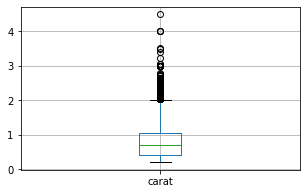

In [39]:
plt.figure(figsize=(5,3))
df_gems.boxplot(column=['carat'])
plt.show()

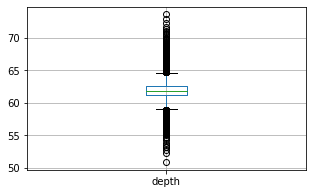

In [40]:
plt.figure(figsize=(5,3))

df_gems.boxplot(column=['depth'])
plt.show()

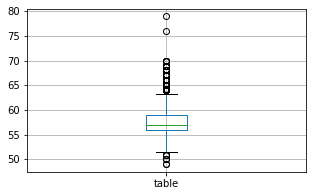

In [41]:

plt.figure(figsize=(5,3))
df_gems.boxplot(column=['table'])
plt.show()

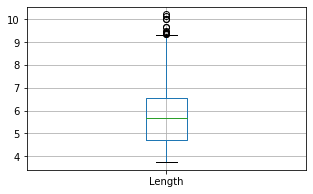

In [42]:
plt.figure(figsize=(5,3))

df_gems.boxplot(column=['Length'])
plt.show()

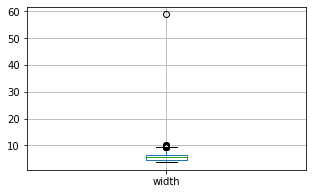

In [43]:

plt.figure(figsize=(5,3))
df_gems.boxplot(column=['width'])
plt.show()

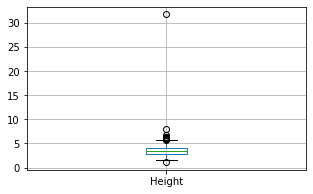

In [44]:
plt.figure(figsize=(5,3))
df_gems.boxplot(column=['Height'])
plt.show()

***All the above variables are having outliers, we will need to treat them***

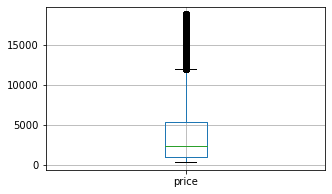

In [45]:
plt.figure(figsize=(5,3))
df_gems.boxplot(column=['price'])
plt.show()

***Price being the target variable we dont need to treat this***

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
lrdepth,urdepth=remove_outlier(df_gems['depth'])
df_gems['depth']=np.where(df_gems['depth']>urdepth,urdepth,df_gems['depth'])
df_gems['depth']=np.where(df_gems['depth']<lrdepth,lrdepth,df_gems['depth'])

lrcarat,urcarat=remove_outlier(df_gems['carat'])
df_gems['carat']=np.where(df_gems['carat']>urcarat,urcarat,df_gems['carat'])
df_gems['carat']=np.where(df_gems['carat']<lrcarat,lrcarat,df_gems['carat'])

lrtable,urtable=remove_outlier(df_gems['table'])
df_gems['table']=np.where(df_gems['table']>urtable,urtable,df_gems['table'])
df_gems['table']=np.where(df_gems['table']<lrtable,lrtable,df_gems['table'])

lrLength,urLength=remove_outlier(df_gems['Length'])
df_gems['Length']=np.where(df_gems['Length']>urLength,urLength,df_gems['Length'])
df_gems['Length']=np.where(df_gems['Length']<lrLength,lrLength,df_gems['Length'])

lrwidth,urwidth=remove_outlier(df_gems['width'])
df_gems['width']=np.where(df_gems['width']>urwidth,urwidth,df_gems['width'])
df_gems['width']=np.where(df_gems['width']<lrwidth,lrwidth,df_gems['width'])

lrHeight,urHeight=remove_outlier(df_gems['Height'])
df_gems['Height']=np.where(df_gems['Height']>urHeight,urHeight,df_gems['Height'])
df_gems['Height']=np.where(df_gems['Height']<lrHeight,lrHeight,df_gems['Height'])

lrprice,urprice=remove_outlier(df_gems['price'])
df_gems['price']=np.where(df_gems['price']>urprice,urprice,df_gems['price'])
df_gems['price']=np.where(df_gems['price']<lrprice,lrprice,df_gems['price'])


<AxesSubplot:>

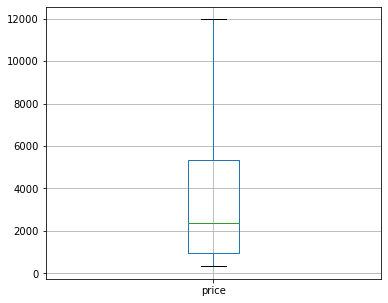

In [48]:
# we will not treat the outlier in the column price as it is a target variable.
df_gems.boxplot(column="price",return_type='axes',figsize=(6,5))


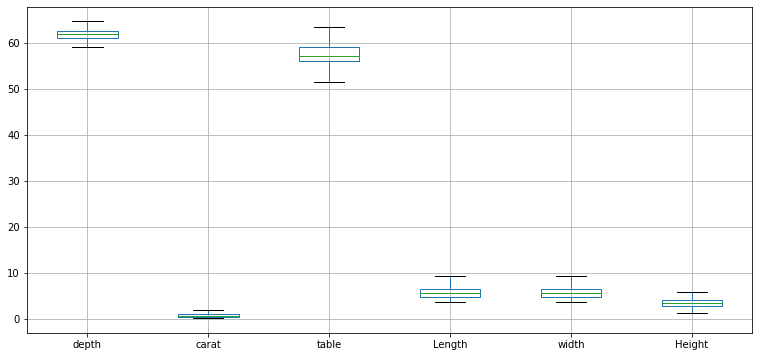

In [49]:
plt.figure(figsize=(13,6))
df_gems.boxplot(column=['depth','carat','table','Length','width','Height'])
plt.show()

#### Outliers have been removed from the most of the variables.

<AxesSubplot:>

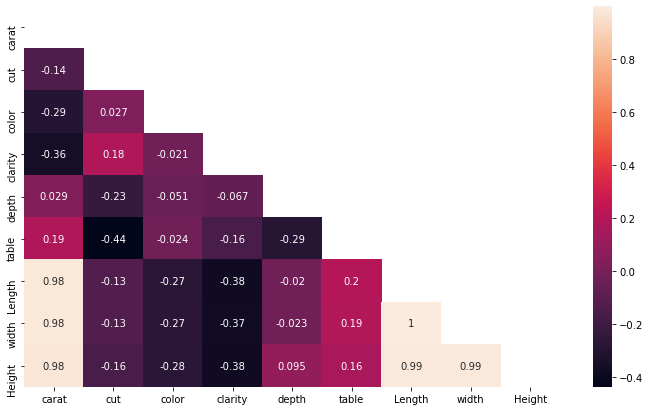

In [50]:
plt.figure(figsize=(12,7))
corr=df_gems.iloc[:,0:9].corr()
mask=np.triu(np.ones_like(corr,dtype=np.bool))
sns.heatmap(df_gems.iloc[:,0:9].corr(), annot=True,mask=mask)

***Correlation plot shows thtat there is a correlation in the variables x,y,z.***

###  Scalling:- 
* ***Scaling of the dataset is not necessary***
***Cut, Colour, Clarity will need to be encoaded at next level as they are ategorical in nature, and dont need scaling***
***all other variables are in similar format except variable price, and price is target variable, hence no need of scaling.***

In [51]:
df_gems['price'].value_counts()

11972.5    1778
544.0        74
625.0        67
776.0        66
828.0        66
           ... 
5823.0        1
8856.0        1
3362.0        1
4121.0        1
5639.0        1
Name: price, Length: 7278, dtype: int64

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [52]:
for column in df_gems.columns:
    if df_gems[column].dtype == 'object':
        print(column.upper(),': ',df_gems[column].nunique())
        print(df_gems[column].value_counts().sort_values())
        print('\n')

In [53]:
df_gems.cut.value_counts()

4    10805
3     6886
2     6027
1     2435
0      780
Name: cut, dtype: int64

In [54]:
df_gems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int8   
 2   color    26933 non-null  int8   
 3   clarity  26933 non-null  int8   
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   Length   26933 non-null  float64
 7   width    26933 non-null  float64
 8   Height   26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 1.7 MB


In [55]:
df_gems.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.793298,0.462127,0.20,0.40,0.70,1.05,2.025
cut,26933.0,2.909702,1.113165,0.00,2.00,3.00,4.00,4.000
color,26933.0,3.394794,1.705883,0.00,2.00,3.00,5.00,6.000
clarity,26933.0,3.053577,1.646749,0.00,2.00,3.00,4.00,7.000
depth,26933.0,61.750462,1.218530,59.00,61.10,61.80,62.50,64.600
table,26933.0,57.435544,2.157119,51.50,56.00,57.00,59.00,63.500
Length,26933.0,5.729601,1.125704,3.73,4.71,5.69,6.55,9.310
width,26933.0,5.731526,1.117663,3.71,4.72,5.70,6.54,9.270
Height,26933.0,3.537620,0.695577,1.19,2.90,3.52,4.04,5.750
price,26933.0,3735.832213,3468.207359,326.00,945.00,2375.00,5356.00,11972.500


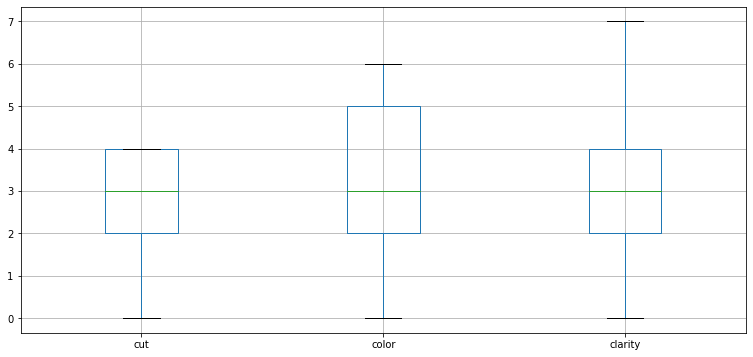

In [56]:
plt.figure(figsize=(13,6))
df_gems.boxplot(column=['cut','color','clarity'])
plt.show()

In [57]:
df_gems.head()

,carat,cut,color,clarity,depth,table,Length,width,Height,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779.0


In [58]:
df_gems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int8   
 2   color    26933 non-null  int8   
 3   clarity  26933 non-null  int8   
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   Length   26933 non-null  float64
 7   width    26933 non-null  float64
 8   Height   26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 1.7 MB


In [59]:
Y=df_gems[['price']]
X=df_gems.drop('price',axis=1)


In [60]:
X.head()

,carat,cut,color,clarity,depth,table,Length,width,Height
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65


In [61]:
df_gems.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.793298,0.462127,0.20,0.40,0.70,1.05,2.025
cut,26933.0,2.909702,1.113165,0.00,2.00,3.00,4.00,4.000
color,26933.0,3.394794,1.705883,0.00,2.00,3.00,5.00,6.000
clarity,26933.0,3.053577,1.646749,0.00,2.00,3.00,4.00,7.000
depth,26933.0,61.750462,1.218530,59.00,61.10,61.80,62.50,64.600
table,26933.0,57.435544,2.157119,51.50,56.00,57.00,59.00,63.500
Length,26933.0,5.729601,1.125704,3.73,4.71,5.69,6.55,9.310
width,26933.0,5.731526,1.117663,3.71,4.72,5.70,6.54,9.270
Height,26933.0,3.537620,0.695577,1.19,2.90,3.52,4.04,5.750
price,26933.0,3735.832213,3468.207359,326.00,945.00,2375.00,5356.00,11972.500


In [62]:
Y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [64]:
print('Training set shape for the independent variables:',X_train.shape)
print('Training set shape for the dependent variable:',Y_train.shape)
print('Testing set shape for the independent variables:',X_test.shape)
print('Testing set shape for the dependent variable:',Y_test.shape)

Training set shape for the independent variables: (18853, 9)
Training set shape for the dependent variable: (18853, 1)
Testing set shape for the independent variables: (8080, 9)
Testing set shape for the dependent variable: (8080, 1)


In [65]:
len_reg_model=LinearRegression()
len_reg_model.fit(X_train,Y_train)

LinearRegression()

In [67]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, len_reg_model.coef_[0][idx]))

The coefficient for carat is 8882.947011046805
The coefficient for cut is 110.29869790685389
The coefficient for color is 278.2538388289495
The coefficient for clarity is 440.2126865169571
The coefficient for depth is 29.259797370575345
The coefficient for table is -12.872217262773578
The coefficient for Length is -1244.454005579167
The coefficient for width is 1415.0093687432286
The coefficient for Height is -892.2359295537655


In [68]:
intercept = len_reg_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4807.704182598591


In [69]:
print('The coefficient of determination R^2  that is linear regression score of the prediction on Train set',len_reg_model.score(X_train, Y_train))


The coefficient of determination R^2  that is linear regression score of the prediction on Train set 0.9312966038099512


In [70]:
print('The coefficient of determination R^2 that is linear regression of the prediction on Test set',len_reg_model.score(X_test, Y_test))


The coefficient of determination R^2 that is linear regression of the prediction on Test set 0.9313550972726958


In [71]:
#RMSE on train
print("The Root Mean Square Error (RMSE) of the model for training set is",np.sqrt(mean_squared_error(Y_train,len_reg_model.predict(X_train))))

The Root Mean Square Error (RMSE) of the model for training set is 908.388987756575


In [72]:
#RMSE on Test
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(Y_test,len_reg_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 910.1910120918828


In [73]:
y_pred = len_reg_model.predict(X_test)

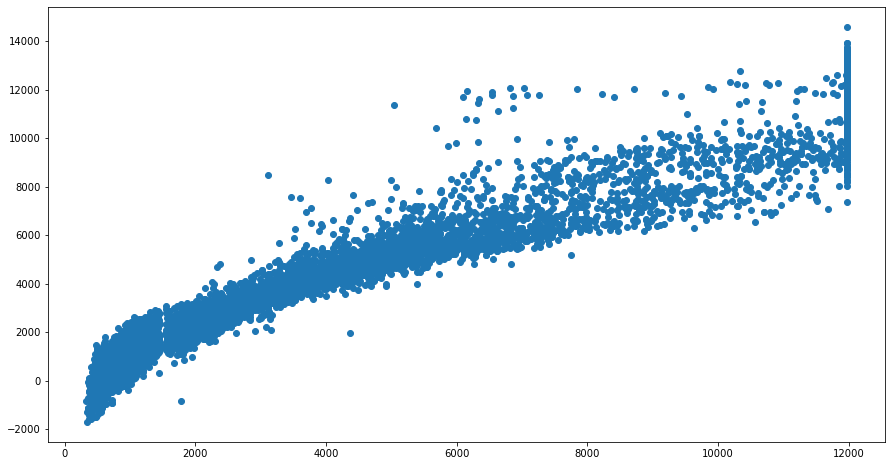

In [74]:
plt.scatter(Y_test['price'], y_pred)
plt.show()

## Building Linear Regression using Stats Model

In [75]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,Length,width,Height,price
22114,0.34,2,2,3,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,5,3,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,3,2,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,5,1,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,4,1,61.1,62.0,6.54,6.49,3.98,4057.0


In [76]:
expr= 'price ~ carat + cut + color+clarity+depth +table + Length + width + Height '

In [77]:
import statsmodels.formula.api as smf
len_reg_stats = smf.ols(formula= expr, data = data_train).fit()
len_reg_stats.params

Intercept   -4807.704183
carat        8882.947011
cut           110.298698
color         278.253839
clarity       440.212687
depth          29.259797
table         -12.872217
Length      -1244.454006
width        1415.009369
Height       -892.235930
dtype: float64

In [78]:
print(len_reg_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.838e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:14:20   Log-Likelihood:            -1.5517e+05
No. Observations:               18853   AIC:                         3.104e+05
Df Residuals:                   18843   BIC:                         3.104e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4807.7042    797.327     -6.030      0.0

In [79]:
mse = np.mean((len_reg_stats.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [80]:
np.sqrt(mse)

908.3889877565736

In [81]:
for i,j in np.array(len_reg_stats.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-4807.7) * Intercept + (8882.95) * carat + (110.3) * cut + (278.25) * color + (440.21) * clarity + (29.26) * depth + (-12.87) * table + (-1244.45) * Length + (1415.01) * width + (-892.24) * Height + 

In [82]:
data_test.iloc[0:1]
len_reg_stats.predict(data_test)

16997     6217.154136
24457     4307.871317
16612     8989.444921
308       4054.685426
26652    12503.863541
             ...     
25016     1102.373427
8485      5783.253681
26891     4758.742187
17455     4223.073070
26169     4504.139878
Length: 8080, dtype: float64

In [83]:
#Mean actual precentage error Calculation
def mape (actual,pred):
    actual,pred = np.array(actual),np.array(pred)
    return np.mean(np.abs(actual-pred)/actual)*100
print('train MAPE :',mape(data_train.price,len_reg_stats.predict(data_train.drop('price',axis=1))))
print('test MAPE :',mape(data_test.price,len_reg_stats.predict(data_test.drop('price',axis=1))))


train MAPE : 37.72515394599418
test MAPE : 38.160801066903474


In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [85]:
y_pred = len_reg_stats.predict(data_test)

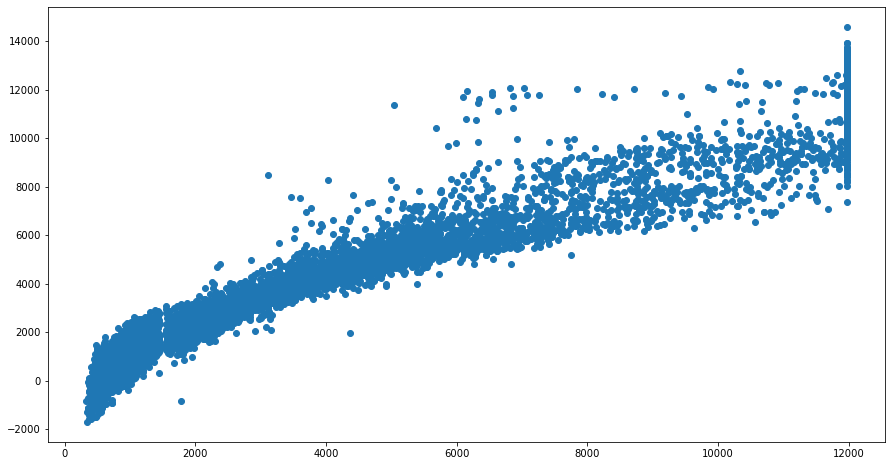

In [86]:
plt.scatter(Y_test['price'], y_pred)
plt.show()

In [87]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 


In [88]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.2400280577063
cut ---> 10.20677832869842
color ---> 5.5458270955002344
clarity ---> 5.451638757308797
depth ---> 1170.0725622469577
table ---> 853.0677652382703
Length ---> 10609.352690226118
width ---> 9416.341551477624
Height ---> 3067.3149555004325


In [89]:
#checking with scaled dataset

from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = Y_train.apply(zscore)
y_test_scaled = Y_test.apply(zscore)


In [90]:
RM = LinearRegression()
RM.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [91]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, RM.coef_[0][idx]))

The coefficient for carat is 1.179353516861013
The coefficient for cut is 0.035209916804188904
The coefficient for color is 0.13678998206679305
The coefficient for clarity is 0.20936465660848505
The coefficient for depth is 0.01021814125718082
The coefficient for table is -0.007999050074384482
The coefficient for Length is -0.4028206808641224
The coefficient for width is 0.4548472301310047
The coefficient for Height is -0.17847790148706372


In [92]:
intercept =RM.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.42822302978025e-17


In [93]:
# Model score - R2 or coeff of determinant

RM.score(X_test_scaled, y_test_scaled)

0.931340115252776

In [94]:
mse = np.mean((RM.predict(X_test_scaled)-y_test_scaled)**2)

In [95]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2620303126495559

##  1.4 Inference: Basis on these predictions, what are the business insights and recommendations.


****•	With R^2 on train and test data being almost same and RMSE on train and test data is the departure point from regression line***

****Scatter plot is looking quite linear, though there is spread in dataset.***

***P-values in the OLS summary are less than 0.05 in all variables, hence there is hight chance of finding these attributes co-efficient in the real business. Variables are playing positive role in deciding the dependent variable. Hence can be good predictor of price for cubic zirconia.*** 